In [34]:
import pandas as pd
import matplotlib.pylab as plt
from collections import defaultdict
import numpy as np
from tqdm import tqdm
import seaborn as sns
from scipy.stats import *

DIC_ZONE_REGION = {
    "us-east-2": "US East (Ohio)",
    "us-east-1": "US East (N. Virginia)",
    "us-west-1": "US West (N. California)",
    "us-west-2": "US West (Oregon)",
    "af-south-1": "Africa (Cape Town)",
    "ap-east-1": "Asia Pacific (Hong Kong)",
    "ap-southeast-3": "Asia Pacific (Jakarta)",
    "ap-south-1": "Asia Pacific (Mumbai)",
    "ap-northeast-3": "Asia Pacific (Osaka)",
    "ap-northeast-2": "Asia Pacific (Seoul)",
    "ap-southeast-1": "Asia Pacific (Singapore)",
    "ap-southeast-2": "Asia Pacific (Sydney)",
    "ap-northeast-1": "Asia Pacific (Tokyo)",
    "ca-central-1": "Canada (Central)",
    "eu-central-1": "Europe (Frankfurt)",
    "eu-west-1": "Europe (Ireland)",
    "eu-west-2": "Europe (London)",
    "eu-south-1": "Europe (Milan)",
    "eu-west-3": "Europe (Paris)",
    "eu-north-1": "Europe (Stockholm)",
    "eu-central-2": "Europe (Zurich)",
    "me-south-1": "Middle East (Bahrain)",
    "me-central-1": "Middle East (UAE)",
    "sa-east-1": "South America (São Paulo)",
}

DIC_ZONE_METAREGION = {
    "us-east-2": "US East",
    "us-east-1": "US East",
    "us-west-1": "US West",
    "us-west-2": "US West",
    "af-south-1": "Africa",
    "ap-east-1": "Asia Pacific",
    "ap-southeast-3": "Asia Pacific",
    "ap-south-1": "Asia Pacific",
    "ap-northeast-3": "Asia Pacific",
    "ap-northeast-2": "Asia Pacific",
    "ap-southeast-1": "Asia Pacific",
    "ap-southeast-2": "Asia Pacific",
    "ap-northeast-1": "Asia Pacific",
    "ca-central-1": "Canada",
    "eu-central-1": "Europe",
    "eu-west-1": "Europe",
    "eu-west-2": "Europe",
    "eu-south-1": "Europe",
    "eu-west-3": "Europe",
    "eu-north-1": "Europe",
    "eu-central-2": "Europe",
    "me-south-1": "Middle East",
    "me-central-1": "Middle East",
    "sa-east-1": "South America",
}


plt.rc('font', size=12) #controls default text size
plt.rc('axes', titlesize=12) #fontsize of the title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend


def parse_instance_name_to_region(instance_name):
    return DIC_ZONE_REGION['-'.join(instance_name.split('-')[:-1])]

# Read data

In [24]:
# read the data
df = pd.concat([pd.read_csv('./data.part1.csv.zip'), pd.read_csv('./data.part2.csv.zip')])
df

,ap-southeast-1-4,ap-southeast-1-1,ap-southeast-1-5,ap-southeast-1-3,ap-southeast-1-2,eu-central-1-0,eu-central-1-4,eu-central-1-2,eu-central-1-3,eu-central-1-1,...,ap-south-1-2,ap-south-1-1,ap-south-1-0,ap-southeast-2-2,ap-southeast-2-0,ap-southeast-2-3,ap-southeast-2-1,ap-southeast-2-4,ap-southeast-1-0,src_host
0,0.000000,0.124727,0.170439,0.379552,1.124913,6.716632,6.967956,7.041672,7.108692,7.118496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unnamed: 0
1,96.784461,115.806798,99.621577,100.363790,101.471860,38.883082,39.265409,44.258440,NaN,39.012808,...,86.103965,87.828690,89.036684,92.272412,92.566533,92.681340,96.017957,96.241053,118.133237,ca-central-1-3
2,29.291004,NaN,68.615919,29.615978,28.228127,33.922072,41.849470,34.491587,38.053790,36.715153,...,100.036457,67.245076,60.271342,75.572890,75.865771,76.346132,23.820720,77.056377,42.800727,ap-northeast-2-0
3,36.673880,36.167696,40.881939,41.231263,40.859306,56.817954,55.464096,55.809120,55.417177,56.674206,...,70.979571,70.961412,60.943593,75.600183,74.103899,74.310905,74.102791,75.398551,43.550359,ap-northeast-2-3
4,35.243123,0.000000,2.525280,41.477719,41.619319,66.860688,71.281951,71.318587,71.610837,71.407830,...,69.447283,70.893390,28.146279,87.696606,87.521548,87.777528,87.866449,87.482001,41.542408,ap-southeast-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211913,79.321031,79.249605,79.313353,79.060931,79.322249,33.743785,34.995705,34.880699,33.593693,34.714368,...,92.410270,93.594094,93.407529,125.383608,125.502663,125.561694,125.514281,125.403419,79.407248,us-west-1-5
211914,108.134298,108.141113,108.412454,119.600423,108.138642,101.732179,101.360430,101.743979,101.406915,101.907088,...,137.378518,137.613775,135.784407,154.541244,154.268268,170.147399,154.481259,154.461809,108.048116,ap-northeast-3-0
211915,87.364912,80.749961,77.488296,77.157641,86.626528,44.674920,44.635465,46.643891,43.859331,47.438077,...,103.950979,104.416213,104.323128,116.824522,117.168497,116.911718,116.981832,117.545817,77.875570,ap-northeast-2-4
211916,4.232923,4.216089,5.166123,4.341808,3.846520,18.306978,17.782917,17.924679,18.035336,18.189457,...,34.446223,34.358409,34.450322,51.337120,50.518507,50.195009,50.925777,51.239349,4.101819,ap-northeast-2-4


In [25]:
# add column with info of src host
df['src_host'] = [ r[r.values==0].index[0] for r in tqdm(df.iloc, total=len(df)) ]
df['region'] = [ parse_instance_name_to_region(e) for e in tqdm(df.src_host.iloc, total=len(df))]
df

100%|██████████| 431918/431918 [00:02<00:00, 195895.57it/s]


,ap-southeast-1-4,ap-southeast-1-1,ap-southeast-1-5,ap-southeast-1-3,ap-southeast-1-2,eu-central-1-0,eu-central-1-4,eu-central-1-2,eu-central-1-3,eu-central-1-1,...,ap-south-1-1,ap-south-1-0,ap-southeast-2-2,ap-southeast-2-0,ap-southeast-2-3,ap-southeast-2-1,ap-southeast-2-4,ap-southeast-1-0,src_host,region
0,0.000000,0.124727,0.170439,0.379552,1.124913,6.716632,6.967956,7.041672,7.108692,7.118496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ap-southeast-1-4,Asia Pacific (Singapore)
1,96.784461,115.806798,99.621577,100.363790,101.471860,38.883082,39.265409,44.258440,NaN,39.012808,...,87.828690,89.036684,92.272412,92.566533,92.681340,96.017957,96.241053,118.133237,ca-central-1-3,Canada (Central)
2,29.291004,NaN,68.615919,29.615978,28.228127,33.922072,41.849470,34.491587,38.053790,36.715153,...,67.245076,60.271342,75.572890,75.865771,76.346132,23.820720,77.056377,42.800727,ap-northeast-2-0,Asia Pacific (Seoul)
3,36.673880,36.167696,40.881939,41.231263,40.859306,56.817954,55.464096,55.809120,55.417177,56.674206,...,70.961412,60.943593,75.600183,74.103899,74.310905,74.102791,75.398551,43.550359,ap-northeast-2-3,Asia Pacific (Seoul)
4,35.243123,0.000000,2.525280,41.477719,41.619319,66.860688,71.281951,71.318587,71.610837,71.407830,...,70.893390,28.146279,87.696606,87.521548,87.777528,87.866449,87.482001,41.542408,ap-southeast-1-1,Asia Pacific (Singapore)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211913,79.321031,79.249605,79.313353,79.060931,79.322249,33.743785,34.995705,34.880699,33.593693,34.714368,...,93.594094,93.407529,125.383608,125.502663,125.561694,125.514281,125.403419,79.407248,us-west-1-5,US West (N. California)
211914,108.134298,108.141113,108.412454,119.600423,108.138642,101.732179,101.360430,101.743979,101.406915,101.907088,...,137.613775,135.784407,154.541244,154.268268,170.147399,154.481259,154.461809,108.048116,ap-northeast-3-0,Asia Pacific (Osaka)
211915,87.364912,80.749961,77.488296,77.157641,86.626528,44.674920,44.635465,46.643891,43.859331,47.438077,...,104.416213,104.323128,116.824522,117.168497,116.911718,116.981832,117.545817,77.875570,ap-northeast-2-4,Asia Pacific (Seoul)
211916,4.232923,4.216089,5.166123,4.341808,3.846520,18.306978,17.782917,17.924679,18.035336,18.189457,...,34.358409,34.450322,51.337120,50.518507,50.195009,50.925777,51.239349,4.101819,ap-northeast-2-4,Asia Pacific (Seoul)


# Time distribution by region that listen to

Text(0.5, 0, 'Count transactions')

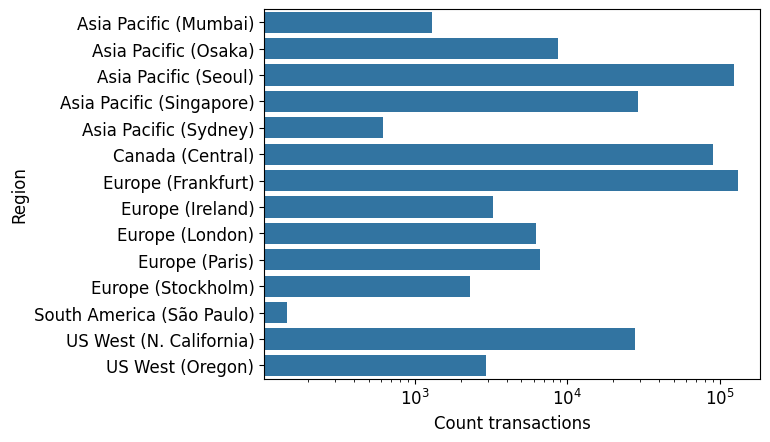

In [38]:
all_regions = sorted(df.region.unique())
sns.countplot(data=df, y='region', order=all_regions, color=sns.color_palette()[0])
plt.xscale('log')
plt.ylabel('Region')
plt.xlabel('Count transactions')

Text(0, 0.5, 'Number of transactions')

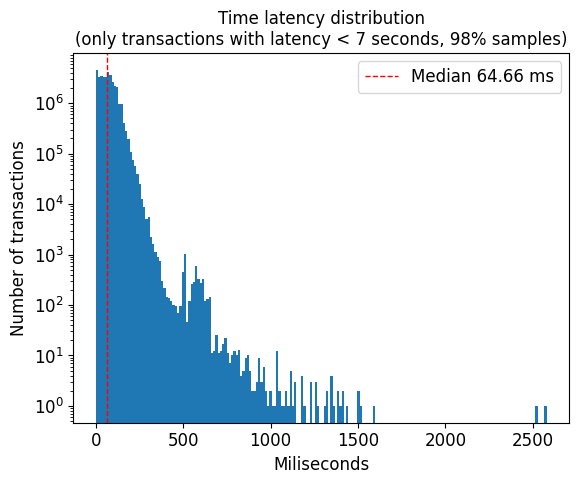

In [42]:
# v = df[[c for c in df.columns[:-2] if parse_instance_name_to_region(c) == region_src ]].values.flatten()
v = df[[c for c in df.columns[:-2] ]].values.flatten()
_ = plt.hist(v[v<7*1000],bins= 200)
plt.axvline(np.median(v[v<7*1000]), color='r', linestyle='dashed', linewidth=1, label=f'Median {np.median(v[v<7*1000]):.2f} ms')
plt.legend()
plt.yscale('log')
plt.title('Time latency distribution\n(only transactions with latency < 7 seconds, 98% samples)')
plt.xlabel('Miliseconds')
plt.ylabel('Number of transactions')



# Compute median and other statistics measure between regions

In [43]:
columns_region = np.array([parse_instance_name_to_region(c) for c in df.columns[:-2]])
all_regions = sorted(set(columns_region))

dic_region2region = defaultdict(dict)
dic_region2region_medians = defaultdict(dict)

for region_src in tqdm(all_regions):
    for region_listen in tqdm(all_regions):
        if region_src == region_listen:
            continue
        M = df[ df.region == region_src][[c for c in df.columns[:-2] if parse_instance_name_to_region(c) == region_listen ]]
        dic_region2region[region_src][region_listen] = {'median':np.nanmedian(M), 'total_data':M.shape[0] *M.shape[1]-np.isnan(M).sum().sum(), 'data':  M.values.flatten() , 'mean':np.nanmean(M)}
        dic_region2region_medians[region_src][region_listen] = np.nanmedian(M)

100%|██████████| 14/14 [00:08<00:00,  1.67it/s]


## Heatmap: Median time latency between regions

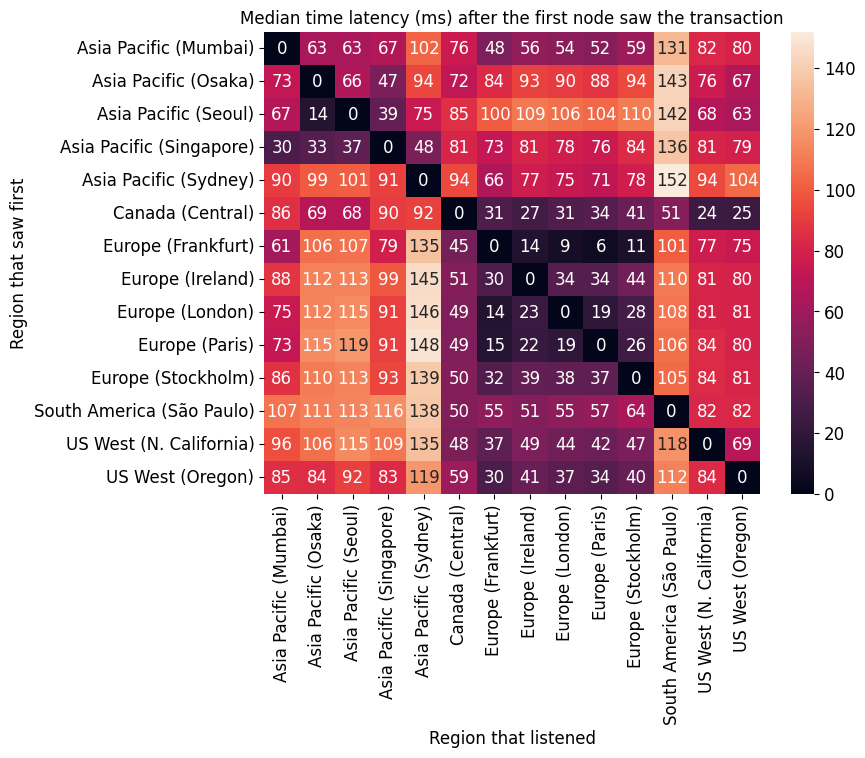

In [49]:
df_medians = pd.DataFrame(dic_region2region_medians).T
df_medians = df_medians[sorted(df_medians.columns)].fillna(0)
sns.heatmap(df_medians, annot=True, fmt=".0f")
plt.title('Median time latency (ms) after the first node saw the transaction')
plt.ylabel('Region that saw first')
_ = plt.xlabel('Region that listened')
fig = plt.gcf()
fig.set_size_inches([8,6])

## Load distances between cities

In [50]:
df_distances = pd.read_csv('distances.csv')
dic_region2region_distances = defaultdict(dict)
for r in df_distances.iloc:
    dic_region2region_distances[r.region1][r.region2] = r.km
    dic_region2region_distances[r.region2][r.region1] = r.km

## Check correlation between median time and distance

In [51]:
median_time_vector = []
distance_km_vector = []
for r1 in all_regions:
    for r2 in all_regions:
        if r1 == r2:
            continue
        try:
            median_time = dic_region2region[r1][r2]['median']
            distance_km = dic_region2region_distances[r1][r2]
            median_time_vector.append(median_time)
            distance_km_vector.append(distance_km)

        except:
            print( r1,',', r2,',')

PearsonRResult(statistic=0.7452021804028595, pvalue=1.672118065972413e-33)


Text(0.5, 1.0, 'Correlation between distance and time latency by pairs of regions\n(rho=0.7452, pval=1.672118065972413e-33)')

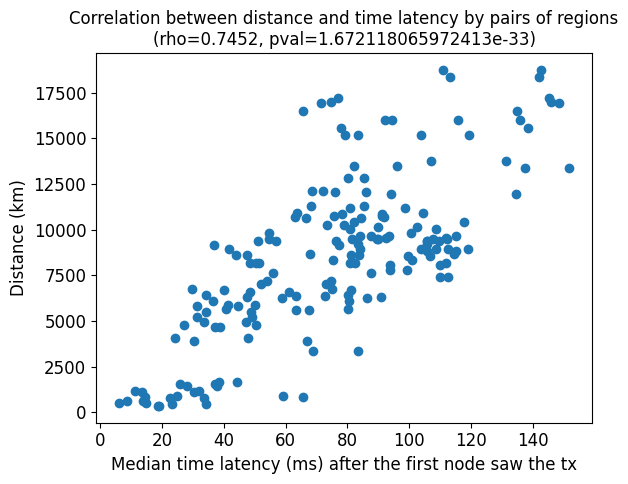

In [52]:
plt.scatter(median_time_vector, distance_km_vector)
print(pearsonr(median_time_vector, distance_km_vector))
plt.xlabel('Median time latency (ms) after the first node saw the tx')
plt.ylabel('Distance (km)')
plt.title(f'Correlation between distance and time latency by pairs of regions\n(rho={pearsonr(median_time_vector, distance_km_vector)[0]:.4f}, pval={pearsonr(median_time_vector, distance_km_vector)[1]})')